# Introduction
ข้อมูลการซื้อของลูกค้ามีประโยชน์อย่างมากที่จะนำไปใช้งานเพื่อต่อยอดในกระบวนการที่เกี่ยวข้องกับ data-driven approach ใน notebook นี้จะแสดงการทำ data analytics โดยอาศัย unsupervised learning ในการช่วยวิเคราะห์หาพฤติกรรมลูกค้าที่ซื้อของจากบริษัทค้าปลีก

# Loading the dataset

In [1]:
import pandas as pd
import numpy as np
df_read = pd.read_excel('online_retail_half.xlsx')

# พิจารณาประเภทข้อมูล
* Invoice : Nominal
* StockCode : Nominal
* Description : Nominal
* Quantity : Quantitative
* Invoice date : Ordinal
* Price : Continuous
* Customer ID : Nominal
* Country : Nominal

# Preprocess

In [2]:
df = df_read.copy()
# Clear any entry with N/A
df = df.dropna()
# Drop duplicate
df = df.drop_duplicates()

# เปลี่ยน invoice ให้เป็น str
df['Invoice'] = df['Invoice'].astype(str)
df['StockCode'] = df['StockCode'].astype(str)
df['Customer ID'] = df['Customer ID'].astype(str)
# นำรายการที่ Quantity ติดลบออก
df = df[df['Quantity'] > 0]
# นำรายการที่ไม่ใช่รายการขายออก
df = df.drop(df[df['StockCode'].apply(str).str[:1].apply(lambda x: x.isnumeric()) == False].index, axis=0)
df_france = df[df['Country'] == 'France']

# สร้างราคาคูณปริมาณ
df['price_qty'] = df['Quantity']*df['Price']

In [3]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,price_qty
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


In [4]:
df.groupby('Customer ID').mean()

,Quantity,Price,price_qty
Customer ID,,,
12346.0,1.000000,7.056667,7.056667
12347.0,11.661972,2.295070,18.638310
12348.0,19.578947,0.704737,11.640000
12349.0,9.910000,4.253400,22.211400
12351.0,12.428571,2.355238,14.330000
...,...,...,...
18283.0,1.483871,2.199401,2.854240
18284.0,18.259259,1.521852,15.247407
18285.0,13.090909,4.563636,34.272727


In [5]:
df_cust = pd.DataFrame(data = {})

In [6]:
df_cust['Total bill'] = df.groupby('Customer ID')['Invoice'].nunique()
df_cust['Total item'] = df.groupby('Customer ID')['Description'].nunique()
df_cust['Total Quantity'] = df.groupby('Customer ID').sum().Quantity
df_cust['Total Price'] = df.groupby('Customer ID').sum().price_qty#df.groupby('Customer ID').sum().Price
#df_cust['Total_price_qty'] = df.groupby('Customer ID').sum().price_qty

df_cust['Avg item'] = df_cust['Total item']/df_cust['Total bill']
df_cust['Avg Quantity'] = df_cust['Total Quantity']/df_cust['Total bill']
df_cust['Avg Price'] = df_cust['Total Price']/df_cust['Total bill']
df_cust_full = df_cust
df_cust = df_cust[['Total bill', 'Avg item', 'Avg Quantity', 'Avg Price']]

In [7]:
df_cust_full

,Total bill,Total item,Total Quantity,Total Price,Avg item,Avg Quantity,Avg Price
Customer ID,,,,,,,
12346.0,2,24,24,169.36,12.0,12.000000,84.680000
12347.0,2,70,828,1323.32,35.0,414.000000,661.660000
12348.0,1,19,372,221.16,19.0,372.000000,221.160000
12349.0,2,93,991,2221.14,46.5,495.500000,1110.570000
12351.0,1,21,261,300.93,21.0,261.000000,300.930000
...,...,...,...,...,...,...,...
18283.0,6,162,322,619.37,27.0,53.666667,103.228333
18284.0,1,27,493,411.68,27.0,493.000000,411.680000
18285.0,1,11,144,377.00,11.0,144.000000,377.000000


In [8]:
df_cust

,Total bill,Avg item,Avg Quantity,Avg Price
Customer ID,,,,
12346.0,2,12.0,12.000000,84.680000
12347.0,2,35.0,414.000000,661.660000
12348.0,1,19.0,372.000000,221.160000
12349.0,2,46.5,495.500000,1110.570000
12351.0,1,21.0,261.000000,300.930000
...,...,...,...,...
18283.0,6,27.0,53.666667,103.228333
18284.0,1,27.0,493.000000,411.680000
18285.0,1,11.0,144.000000,377.000000


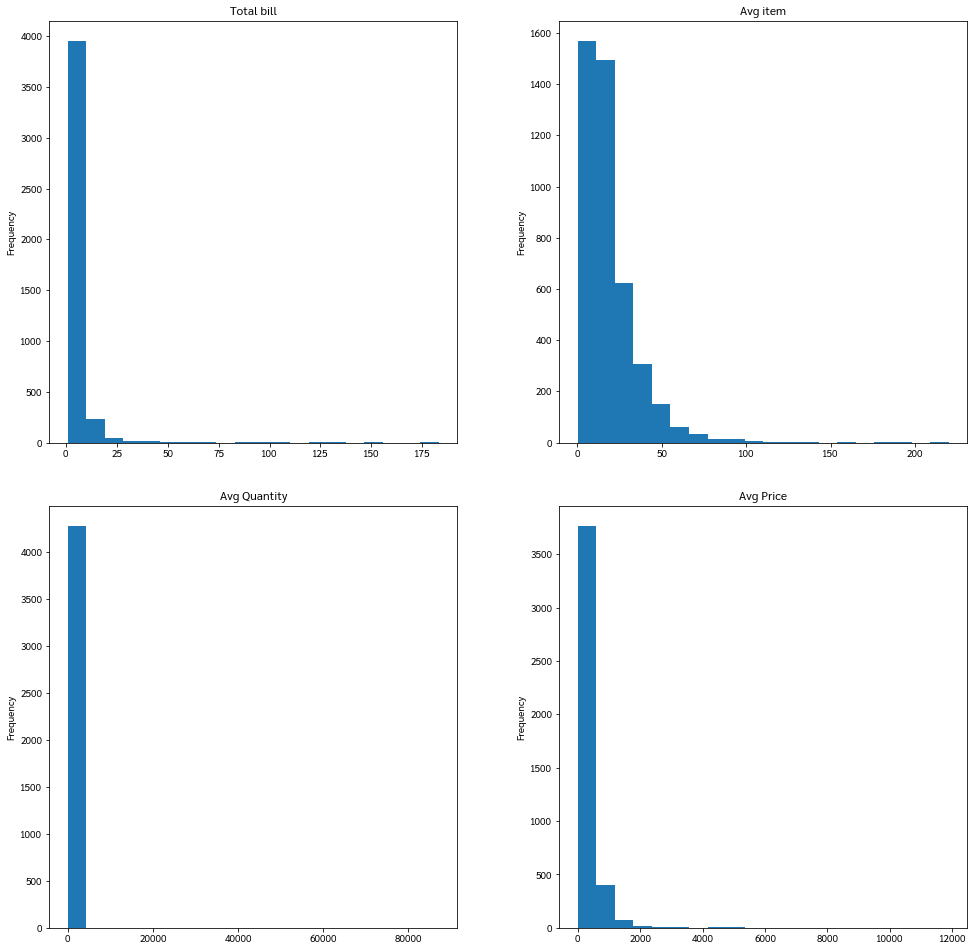

In [9]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.font_manager.fontManager.addfont('Sarabun-Regular.ttf')
matplotlib.rc('font', family='Sarabun')

def histplot(df):
    fig, axes = plt.subplots(nrows=2, ncols=2)
    fig.set_size_inches(15, 15)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.15,
                        wspace=0.25)
    for i,col in enumerate(df.columns):
        df[col].plot(kind = 'hist', bins = 20, ax=axes[i//(2),i%2])
        axes[i//(2),i%2].set_title(col)
histplot(df_cust)

In [10]:
sns.__version__

'0.12.2'

Normalize and Standardize

In [11]:
def preprocess_numeric_data(df_in, method = None):
    df = df_in.copy()
    if method == None:
        return df
    
    elif method == 'norm':
        for col in range(df.shape[1]):
            if df.iloc[:,[col]].dtypes.values != np.object:        
                # Normalization
                df.iloc[:,[col]] = (df.iloc[:,[col]] - df.iloc[:,[col]].min())/(df.iloc[:,[col]].max() - df.iloc[:,[col]].min())
        return df
    
    elif method == 'std':
        for col in range(df.shape[1]):
            if df.iloc[:,[col]].dtypes.values != np.object: 
                # Standardization
                df.iloc[:,[col]] = (df.iloc[:,[col]] - df.iloc[:,[col]].mean())/df.iloc[:,[col]].std()
        return df  

In [12]:
df_std = preprocess_numeric_data(df_in = df_cust, method = 'std')
df_norm = preprocess_numeric_data(df_in = df_cust, method = 'norm')

C:\Users\User\AppData\Local\Temp/ipykernel_6264/806420187.py:15: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df.iloc[:,[col]].dtypes.values != np.object:
C:\Users\User\AppData\Local\Temp/ipykernel_6264/806420187.py:8: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df.iloc[:,[col]].dtypes.values != np.object:


In [13]:
df_std

,Total bill,Avg item,Avg Quantity,Avg Price
Customer ID,,,,
12346.0,-0.305635,-0.415016,-0.157918,-0.597784
12347.0,-0.305635,0.965657,0.097672,0.595638
12348.0,-0.431611,0.005189,0.070969,-0.315490
12349.0,-0.305635,1.655993,0.149489,1.524161
12351.0,-0.431611,0.125247,0.000395,-0.150494
...,...,...,...,...
18283.0,0.198269,0.485423,-0.131426,-0.559419
18284.0,-0.431611,0.485423,0.147900,0.078581
18285.0,-0.431611,-0.475045,-0.073993,0.006849


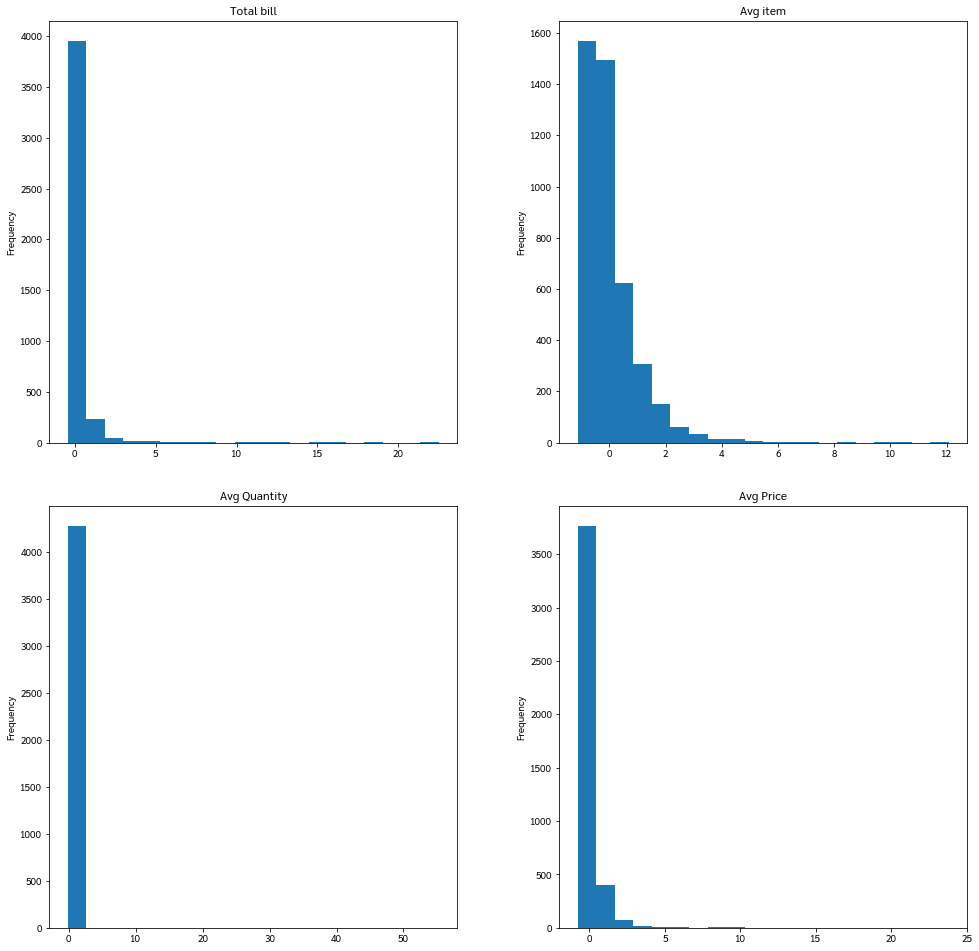

In [14]:
histplot(df_std)

# Kmeans

In [15]:
from sklearn.cluster import KMeans
# Try k from 2 to 20
MIN_K = 2
MAX_K = 20

results = {}

for k in range(MIN_K, MAX_K+1):
    kmeans = KMeans(n_clusters=k, random_state = 42)
    kmeans.fit(df_std)
    results[k] = {
        'labels': kmeans.labels_,
        'centroids': kmeans.cluster_centers_,
        'inertia': kmeans.inertia_,
        'n_iter': kmeans.n_iter_
    }
    print('{}-means: with {} iterations , Inertia={}'.format(k, results[k]['n_iter'], results[k]['inertia']))

2-means: with 2 iterations , Inertia=12988.924573649509
3-means: with 8 iterations , Inertia=10145.920949321338
4-means: with 10 iterations , Inertia=7796.11776863677
5-means: with 37 iterations , Inertia=6358.323656471638
6-means: with 30 iterations , Inertia=5391.907592055096
7-means: with 15 iterations , Inertia=4632.21205831375
8-means: with 29 iterations , Inertia=4009.257360747228
9-means: with 15 iterations , Inertia=3577.7904597923966
10-means: with 22 iterations , Inertia=3185.960576171884
11-means: with 22 iterations , Inertia=2915.2968710703603
12-means: with 21 iterations , Inertia=2573.630775603919
13-means: with 20 iterations , Inertia=2383.86223256345
14-means: with 23 iterations , Inertia=2245.641150687778
15-means: with 16 iterations , Inertia=2061.2356765606496
16-means: with 25 iterations , Inertia=1952.172494238568
17-means: with 32 iterations , Inertia=1814.6669777416496
18-means: with 31 iterations , Inertia=1709.9857749092175
19-means: with 31 iterations , Inerti

# Elbow method

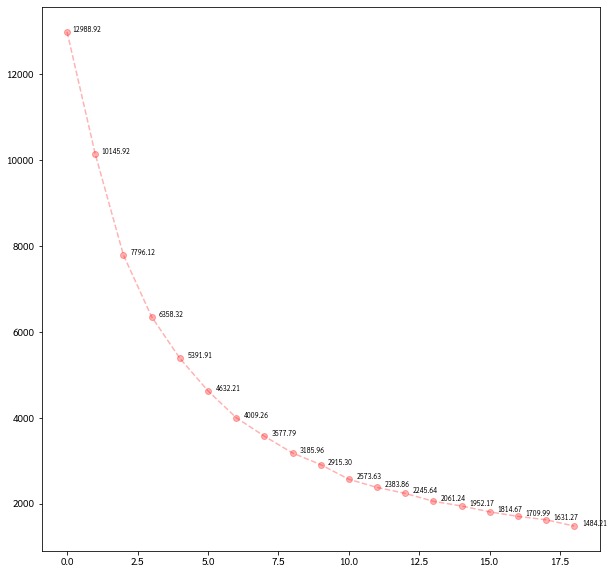

In [16]:
plt.figure(figsize=(10, 10))
plt.plot([results[k]['inertia'] for k in results.keys()],'o--', color='red', alpha=0.3)
for x,y in enumerate([results[k]['inertia'] for k in results.keys()]):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(20,0), # distance from text to points (x,y)
                 fontsize=7,
                 ha='center',) # horizontal alignment can be left, right or center

# Cluster visualization

Total data points is 4285.


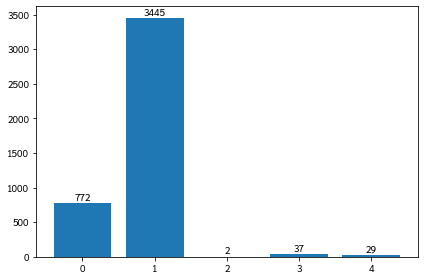

In [17]:
# label ทั้ง 4314 จุด
fig, ax = plt.subplots()
bar = plt.bar([0,1,2,3,4], pd.Series(results[5]['labels']).value_counts().sort_index())
ax.bar_label(bar, padding=1)
fig.tight_layout()
print('Total data points is {}.'.format(pd.Series(results[5]['labels']).count()))

PCA - project ข้อมูลหลายมิติลงบนแกนที่มี Variance มากที่สุด ทำให้สามารถแสดงข้อมูลได้ภายในมิติที่ลดลงและเก็บรายละเอียดไว้ให้ได้มากที่สุด

In [18]:
from sklearn.decomposition import PCA
pca = PCA()
transactions_2d = pca.fit_transform(df_std)
centroids = pca.transform(results[5]['centroids']).tolist()

c5 = list(zip(results[5]['labels'],transactions_2d[:,0],transactions_2d[:,1]))

features = df_std.columns.to_list()
# คำนวณ Loading เพื่อแสดงส่วนประกอบของ pca
# ref: https://scentellegher.github.io/machine-learning/2020/01/27/pca-loadings-sklearn.html
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

Variance ที่แต่ละ component อธิบายได้

In [19]:
exp_var = np.array(([0]+[x*100 for x in list(pca.explained_variance_ratio_)])).cumsum()
exp_var

array([  0.        ,  42.07550607,  70.09910886,  91.22287286,
       100.        ])

Text(0, 0.5, 'explained variance(%)')

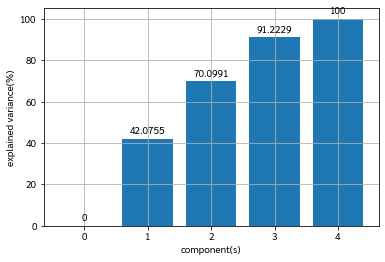

In [20]:
fig, ax = plt.subplots()
bar = plt.bar(range(0,len(exp_var)), exp_var)
ax.bar_label(bar, padding=3)
ax.grid()
plt.xlabel("component(s)")
plt.ylabel("explained variance(%)")

In [21]:
f'{pca.explained_variance_ratio_[0]:.2f}'

'0.42'

In [22]:
loadings[0]

array([ 0.04948485,  0.81964319, -0.56347443,  0.09073512])

<AxesSubplot:>

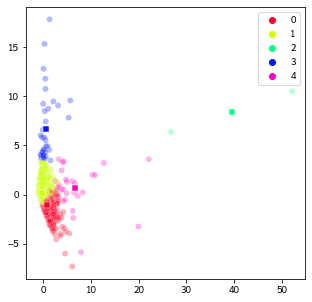

In [23]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x=transactions_2d[:,0], y=transactions_2d[:,1], hue=results[5]['labels']
                ,legend="full", palette="gist_rainbow",alpha = 0.3)
sns.scatterplot(x=[c[0] for c in centroids], y=[c[1] for c in centroids], hue=range(5), marker = 's'
                ,legend = False, palette="gist_rainbow")

# Plot 

<Figure size 864x576 with 0 Axes>

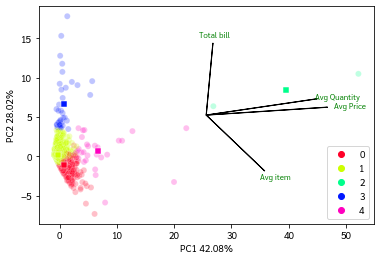

In [24]:
plt.figure(figsize=(12, 8))
fig,axes = plt.subplots()
fig = sns.scatterplot(x=[r[1] for r in c5], y=[r[2] for r in c5], hue=[r[0] for r in c5]
                ,legend="full", palette="gist_rainbow",alpha = 0.25)
fig = sns.scatterplot(x=[c[0] for c in centroids], y=[c[1] for c in centroids]
                      , hue=np.arange(5), marker = 's'
                      ,legend = False, palette="gist_rainbow",alpha = 1)

axes.set_xlabel('PC1 {}%'.format(f'{pca.explained_variance_ratio_[0]*100:.2f}'))
axes.set_ylabel('PC2 {}%'.format(f'{pca.explained_variance_ratio_[1]*100:.2f}'))

x_axis_gap = (axes.get_xlim()[1]-axes.get_xlim()[0])
x_axis_mid = (axes.get_xlim()[0]+axes.get_xlim()[1])/2
y_axis_gap = (axes.get_ylim()[1]-axes.get_ylim()[0])
y_axis_mid = (axes.get_ylim()[0]+axes.get_ylim()[1])/2

for i, feature in enumerate(features[:4]):
    fig.arrow(x_axis_mid, y_axis_mid, loadings[i,0]*x_axis_gap*0.4
              , loadings[i,1]*y_axis_gap*0.4, alpha = 1, width = 0.025)
    plt.text(x_axis_mid+loadings[i,0]*x_axis_gap*0.475
             ,y_axis_mid+loadings[i,1]*y_axis_gap*0.45, features[i], color = 'g', ha = 'center', va = 'center', size = 8)
    

# พิจารณาลักษณะลูกค้าจาก PCA
จาก PCA จะเห็นว่ากลุ่มลูกค้าถูกแบ่งตามจำนวนการซื้อ(ทั้งจำนวนบิล เงินที่ใช้ทั้งหมด และปริมาณสินค้าทั้งหมด) และค่าเฉลี่ยรายการต่อบิล

* ลูกค้ากลุ่มที่ 3 จะมีความโดดเด่นเรื่องจำนวนรอบการซื้อเฉลี่ย(จำนวนบิลเยอะ)
* ลูกค้ากลุ่มที่ 4 จะมีความโดดเด่นเรื่องจำนวนสินค้าและราคาสินค้าเฉลี่ยต่อบิล
* ลูกค้ากลุ่มที่ 0 จะมีความโดดเด่นเรื่องความหลากหลายโดยเฉลี่ยของสินค้าที่ซื้อ(บิลนึงจะมีสินค้าหลายชนิดกว่ากลุ่มอื่น) แต่ปริมาณและราคาการซื้อต่อบิลจะไม่สูงนัก
* ลูกค้ากลุ่มที่ 1 จะไม่ค่อยมีความโดดเด่นเท่าไรนัก ทั้งจำนวนรอบการซื้อ ปริมาณ และความหลากหลายของสินค้า

# Apply label
นำ Label ที่ไ้ด้จากการ clustering ไปใส่คืนใน dataset ของเรา

In [25]:
df_cust = pd.concat([df_cust, pd.Series(results[5]['labels'], index = df_cust.index)], axis = 1
                   ,names=list(df_cust) + ['Cluster'])
df_cust.rename(columns = {0:'Cluster'}, inplace = True)

เพิ่ม Label ที่เราแบ่งได้ให้กับ df_cust_full ด้วย เพื่อประโยชน์ในการพิจารณารายได้รวม

In [26]:
df_cust_full = pd.concat([df_cust_full, pd.Series(results[5]['labels'], index = df_cust_full.index)], axis = 1
                   ,names=list(df_cust_full) + ['Cluster'])
df_cust_full.rename(columns = {0:'Cluster'}, inplace = True)

In [27]:
df_cust

,Total bill,Avg item,Avg Quantity,Avg Price,Cluster
Customer ID,,,,,
12346.0,2,12.0,12.000000,84.680000,1
12347.0,2,35.0,414.000000,661.660000,0
12348.0,1,19.0,372.000000,221.160000,1
12349.0,2,46.5,495.500000,1110.570000,0
12351.0,1,21.0,261.000000,300.930000,1
...,...,...,...,...,...
18283.0,6,27.0,53.666667,103.228333,1
18284.0,1,27.0,493.000000,411.680000,1
18285.0,1,11.0,144.000000,377.000000,1


In [28]:
df_cust_full

,Total bill,Total item,Total Quantity,Total Price,Avg item,Avg Quantity,Avg Price,Cluster
Customer ID,,,,,,,,
12346.0,2,24,24,169.36,12.0,12.000000,84.680000,1
12347.0,2,70,828,1323.32,35.0,414.000000,661.660000,0
12348.0,1,19,372,221.16,19.0,372.000000,221.160000,1
12349.0,2,93,991,2221.14,46.5,495.500000,1110.570000,0
12351.0,1,21,261,300.93,21.0,261.000000,300.930000,1
...,...,...,...,...,...,...,...,...
18283.0,6,162,322,619.37,27.0,53.666667,103.228333,1
18284.0,1,27,493,411.68,27.0,493.000000,411.680000,1
18285.0,1,11,144,377.00,11.0,144.000000,377.000000,1


In [29]:
df_cust_full.groupby('Cluster').sum()['Total Price']

Cluster
0    1130589.06
1    4948694.00
2      45904.10
3    1965478.66
4     548976.63
Name: Total Price, dtype: float64

# Visualization
พิจารณาลักษณะของลูกค้าให้ละเอียดยิ่งขึ้นด้วย visualization แบบต่างๆ

In [30]:
np.sort(df_cust['Cluster'].unique())


array([0, 1, 2, 3, 4])

* Box plot

In [31]:
import plotly.express as px

def boxplot():
    fig, axes = plt.subplots(nrows=2, ncols=2)
    fig.set_size_inches(15, 15)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.15,
                        wspace=0.25)
    for i,col in enumerate(df_cust.columns[:-1]):   
        data = [df_cust[df_cust['Cluster'] == c][col] for c in np.sort(df_cust['Cluster'].unique())]    
        axes[i//(2),i%2].boxplot(data, whis = 1.5)
        axes[i//(2),i%2].set_title(col)
        plt.setp(axes[i//(2),i%2], xticklabels=['0', '1', '2','3','4'])

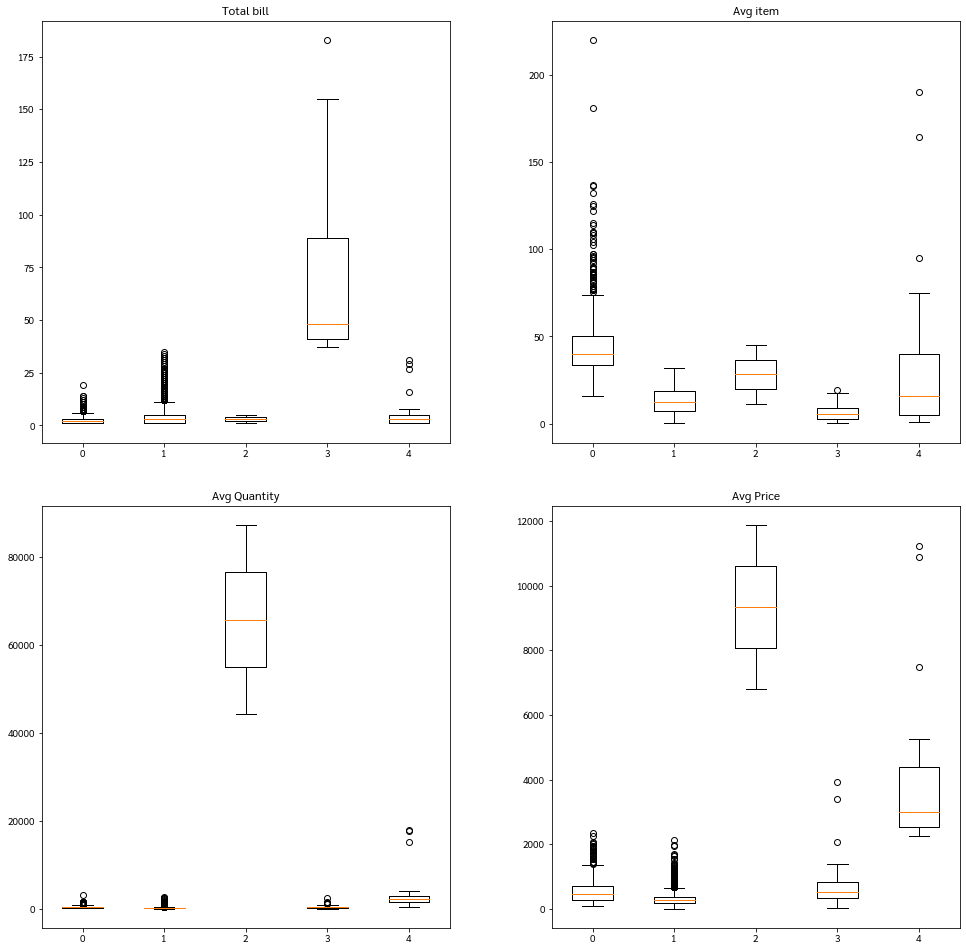

In [32]:
boxplot()

* Bar plot

In [33]:
def barplot():
    fig, axes = plt.subplots(nrows=3, ncols=2)
    fig.set_size_inches(15, 15)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                        wspace=0.35)
    
    for i,col in enumerate(df_cust.columns[:-1]): 
        bar = sns.barplot(ax=axes[i//(2),i%2], data=df_cust, x='Cluster', y=col, errorbar = None)
        for container in bar.containers:
            bar.bar_label(container)
        axes[i//(2),i%2].set_title(col)
        axes[i//(2),i%2].set_xticks(range(5))
    
    data_full = df_cust_full.groupby('Cluster').sum()['Total Price']/df_cust_full.groupby('Cluster').sum()['Total Price'].sum()
    total_bar = sns.barplot(ax=axes[2,0], data=df_cust_full, x=df_cust_full.groupby('Cluster').sum()['Total Price'].index.tolist()
                            , y=data_full, errorbar = None)
    total_bar.set_title('Sale percentage')
    for container in total_bar.containers:
            total_bar.bar_label(container,fmt='%.2f')
    plt.setp(axes[2,0], xticklabels=['0', '1', '2','3','4'])
    
    sale_bar = axes[2,1].bar([0,1,2,3,4], pd.Series(results[5]['labels']).value_counts().sort_index())
    axes[2,1].bar_label(sale_bar, padding=1)
    axes[2,1].set_title('จำนวนลูกค้าในแต่ละกลุ่ม')

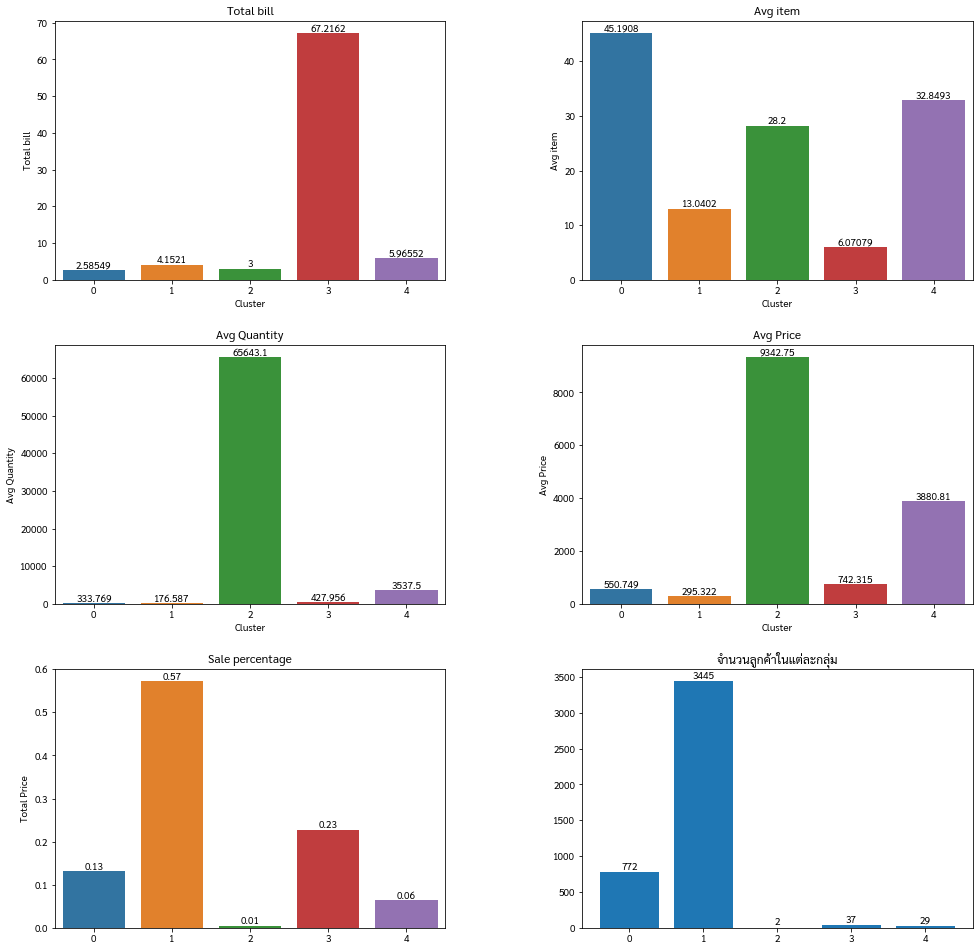

In [34]:
barplot()

# Analyze details in each cluster

<b>Cluster0: จำนวน 772
* ลูกค้ากลุ่มนี้ซื้อของเฉลี่ยราวๆ 2-3 ครั้ง แต่ก็มีบางคนที่ซื้อมากกว่าสิบครั้งเหมือนกัน
* ในการซื้อแต่ละครั้งลูกค้ากลุ่มนี้จะซื้อสินค้าเฉลี่ยประมาณ45ชนิด บางคนซื้อเฉลี่ยเกิน 100 ชนิดต่อครั้ง
* ปริมาณการซื้อโดยเฉลี่ยต่อครั้งอยู่ที่ 333 ชิ้นต่อครั้ง ถือว่าไม่สูงกว่ากลุ่มอื่น
* จำนวนเงินต่อบิลโดยเฉลี่ยอยู่ที่ประมาณ 550 แต่บางคนยอดเฉลี่ยก็เกิน 2000 

หากลองพิจารณาลักษณะการซื้อของลูกค้ากลุ่มนี้แล้ว ลูกค้ากลุ่มนี้มีพฤติกรรมที่ซื้อของทีละหลายๆชนิด แต่ชนิดละน้อยๆ ทำให้ค่าใช้จ่ายต่อบิลอยู่ในระดับที่ไม่สูง อย่างไรก็ตามหากลูกค้ากลุ่มนี้ซื้อปริมาณที่เยอะยอดขายก็จะเยอะเช่นกัน ยอดขายจากลูกค้ากลุ่มนี้คิดเป็น 13% ของทั้งหมด

 <b>Cluster1: จำนวน 3445
* ลูกค้ากลุ่มนี้ซื้อของเฉลี่ยราวๆ 4-5 ครั้ง แต่ก็มีบางคนที่มีรอบการซื้อมากกว่า 50 ครั้ง
* ในการซื้อแต่ละครั้งลูกค้ากลุ่มนี้จะซื้อสินค้าเฉลี่ยประมาณ 13 ชนิด
* ปริมาณการซื้อโดยเฉลี่ยต่อครั้งอยู่ที่ 176 ชิ้นต่อครั้ง ซึ่งเป็นกลุ่มที่ปริมาณการซื้อต่ำที่สุด
* จำนวนเงินต่อบิลโดยเฉลี่ยอยู่ที่ประมาณ 295 ซึ่งเป็นค่าเฉลี่ยที่ต่ำที่สุดต่อบิลของทุกกลุ่มลูกค้า น้อยคนที่จะใช้จ่ายเกิน 1000

ลูกค้ากลุ่มนี้มีพฤติกรรมเหมือนลูกค้าทั่วไปคือมีปริมาณการซื้อที่น้อยและก็ทำยอดขายต่อการซื้อได้น้อยด้วย ถึงอย่างนั้นลูกค้ากลุ่มนี้ถือเป็นลูกค้ากลุ่มใหญ่ที่ทำยอดขายรวมได้ทั้งหมด 57% และภายในกลุ่มลูกค้านี้ก็ยังมีคนที่เป็นลูกค้าประจำที่มาซื้อหลายๆครั้งอีกด้วย 

ฉะนั้นถ้ารักษาลูกค้าประจำไว้และเปลี่ยนคนที่ซื้อได้น้อยๆเป็นลูกค้าประจำได้ ก็จะสามารถเพิ่มยอดขายจากกลุ่มลูกค้านี้ได้มาก<br>
    

<b>Cluster2: จำนวน 2
* เป็นลูกค้าส่วนน้อยที่มีพฤติกรรมการซื้อผิดจากกลุ่มอื่นทั้งหมด คือจะซื้อสินค้าต่อบิลละหลายหมื่นชิ้นและทำยอดขายต่อบิลสูงมาก
* มีความเป็นไปได้ว่าลูกค้ากลุ่มนี้จะเป็นลูกค้าระดับองค์กร ฝ่ายจัดซื้อของบริษัท หรือหน่วยงานขนาดใหญ่ที่ต้องการซื้อขายทีละมากๆ ฉะนั้นเราสามารถสร้างความสัมพันธ์ที่ใกล้ชิดกับลูกค้ากลุ่มเหล่านี้ได้ เพื่อทำการซื้อขายในระยะยาว

กรณีนี้ข้อมูลมีลักษณะเป็น outlier คือมีปริมาณการซื้อขายที่มากผิดปกติ จึงควรตรวจสอบด้วยว่าข้อมูลนี้เป็นเพียง outlier (มีค่าสูงมาก) หรือเป็น noise (ข้อมูลผิด เป็นเท็จ)

In [35]:
df_cust_full[df_cust_full['Cluster'] == 2]

,Total bill,Total item,Total Quantity,Total Price,Avg item,Avg Quantity,Avg Price,Cluster
Customer ID,,,,,,,,
13687.0,1,45,87167,11880.84,45.0,87167.0,11880.840,2
13902.0,5,57,220596,34023.26,11.4,44119.2,6804.652,2


In [36]:
df[(df['Customer ID'] == '13902.0') | (df['Customer ID'] == '13687.0')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,price_qty
32199,491988,21559,STRAWBERRY LUNCHBOX WITH CUTLERY,6,2009-12-15 10:02:00,2.55,13902.0,Denmark,15.30
32200,491988,79323P,PINK CHERRY LIGHTS,12,2009-12-15 10:02:00,6.75,13902.0,Denmark,81.00
32201,491988,79323W,WHITE CHERRY LIGHTS,24,2009-12-15 10:02:00,5.45,13902.0,Denmark,130.80
32202,491988,21702,SET 5 MINI GATEAUX FRIDGE MAGNETS,12,2009-12-15 10:02:00,1.69,13902.0,Denmark,20.28
32203,491988,21699,SET 5 MINI CHOCOLATE FRIDGE MAGNETS,12,2009-12-15 10:02:00,1.69,13902.0,Denmark,20.28
...,...,...,...,...,...,...,...,...,...
358774,524174,16047,POP ART PEN CASE & PENS,5184,2010-09-27 16:30:00,0.08,13687.0,United Kingdom,414.72
358775,524174,16046,TEATIME PEN CASE & PENS,4608,2010-09-27 16:30:00,0.08,13687.0,United Kingdom,368.64
358776,524174,16043,POP ART PUSH DOWN RUBBER,960,2010-09-27 16:30:00,0.06,13687.0,United Kingdom,57.60
358777,524174,10123G,ARMY CAMO WRAPPING TAPE,1104,2010-09-27 16:30:00,0.06,13687.0,United Kingdom,66.24


<b>Cluster3: จำนวน 37
* ลูกค้ากลุ่มนี้มีลักษณะคล้ายกับกลุ่มที่ 0 และ 1 คือ ซื้อทีละไม่มากนักและยอดขายต่อบิลก็ไม่ได้ห่างกันมากด้วย แต่จุดเด่นของลูกค้ากลุ่มนี้คือ<b>ซื้อบ่อยมาก</b> จากกราฟยอดบิลจะเห็นได้ชัดเจน
* อาจะเรียกได้เลยว่าทั้ง 37 คนนี้คือ "ลูกค้า(ประจำ)ระดับสูงสุด" เพราะยอดขายจากพวกเขาคิดเป็นอัตราถึง 23% (สูงเป็นอันดับที่2 จากทั้งหมด 5 กลุ่มลูกค้า)   

<b>Cluster4: จำนวน29
* ลูกค้ากลุ่มนี้มีลักษณะคล้ายกับกลุ่มที่2 เพียงแค่ปริมาณการซื้อต่อครั้งอาจจะไม่เยอะเท่า หากพิจารณดีๆแล้วอาจจะถือว่าเป็นกลุ่มเดียวกับกลุ่มที่2ก็ได้ เพียงแค่กลุ่มที่2มีปริมาณการซื้อที่เยอะมากจนเป็น outlier และถูกโมเดลจับไปอยู่อีกกลุ่ม
* เป็นไปได้ว่าลูกค้ากลุ่มนี้จะเป็นระดับองค์กรเช่นเดียวกับกลุ่มที่2
* จากรูป PCA biplot ด้านล่างจะเห็นว่ากลุ่มที่2(สีเขียว) และกลุ่มที่4(สีชมพู) มีลักษณะเด่นในทิศทางเดียวกัน คือ ด้านจำนวนปริมาณการซื้อและยอดขายต่อบิล

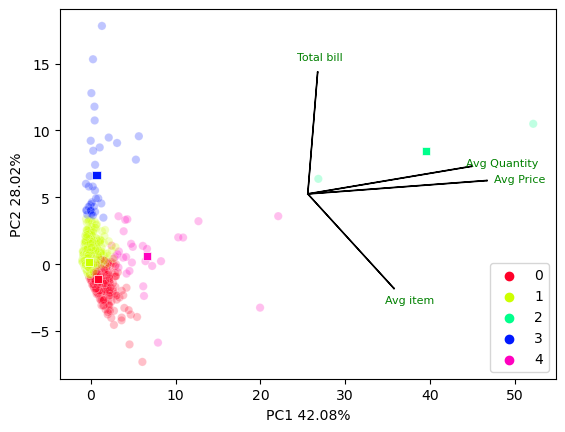

# Data Analytics

สร้าง Chart ต่างๆเพื่อใช้สื่อสารและพรรณาข้อมูลให้เห็นภาพชัดเจนยิ่งขึ้น และอธิบายไปถึงข้อสรุปว่าเรามีแนวทางจะทำอย่างไรบ้าง เพื่อให้บริษัทนี้มียอดขายดีขึ้น ^^

<b>ลักษณะของลูกค้า</b><br>
ลูกค้า Cluster ที่ 0 1 และ 3 มีลักษณะการซื้อแบบลูกค้าทั่วไป คือ ปริมาณการซื้อและยอดการซื้อต่อบิลไม่สูง<br>
ลูกค้า Cluster ที่ 2 และ 4 มีลักษณะการซื้อแบบลูกค้าระดับองค์กร คือ ปริมาณและยอดการซื้อต่อบิลสูงมาก

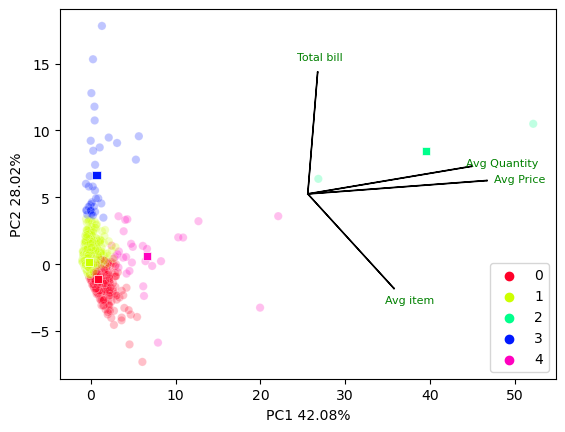

In [37]:
data_full = (df_cust_full.groupby('Cluster').sum()['Total Price']/df_cust_full.groupby('Cluster').sum()['Total Price'].sum())*100
cluster_count = pd.Series(results[5]['labels']).value_counts().sort_index()
cluster_count = (pd.Series(results[5]['labels']).value_counts().sort_index()/cluster_count.sum())*100

df_summary = pd.DataFrame(data = {'count':cluster_count
                                 ,'total sale':data_full
                                 })

Text(0.5, 0, 'purchase frequency')

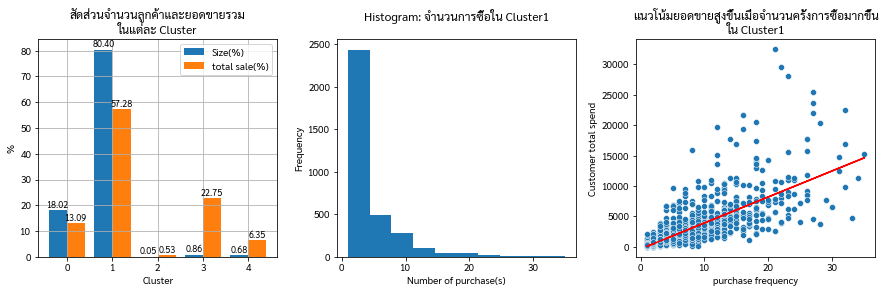

In [38]:
data_c1 = df_cust_full[df_cust_full['Cluster'] == 1]

fig,ax = plt.subplots(1,3)
fig.set_figwidth(15)
plt.subplots_adjust(wspace=0.25)
size_bar = ax[0].bar(np.arange(5)-0.2, df_summary['count'].to_list(), 0.4,label = 'Size(%)')
sale_bar = ax[0].bar(np.arange(5)+0.2, df_summary['total sale'].to_list(), 0.4,label = 'total sale(%)')
ax[0].set_title('สัดส่วนจำนวนลูกค้าและยอดขายรวม\nในแต่ละ Cluster')
ax[0].set_xlabel('Cluster')
ax[0].set_ylabel("%")
ax[0].grid(True)
ax[0].bar_label(size_bar, padding=1, fmt='%.2f', size = 9)
ax[0].bar_label(sale_bar, padding=1, fmt='%.2f', size = 9)
ax[0].legend()

ax[1].hist(data_c1['Total bill'],bins = 10)
ax[1].set_title('Histogram: จำนวนการซื้อใน Cluster1\n ')
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("Number of purchase(s)")

data_c1 = df_cust_full[df_cust_full['Cluster'] == 1]
scatter = sns.scatterplot(ax = ax[2], data = data_c1
                        ,y = 'Total Price', x = 'Total bill'
                        )
z = np.polyfit(data_c1['Total bill'], data_c1['Total Price'], 1)
p = np.poly1d(z)
ax[2].plot(data_c1['Total bill'], p(data_c1['Total bill']),c = 'red')

ax[2].set_title('แนวโน้มยอดขายสูงขึ้นเมื่อจำนวนครั้งการซื้อมากขึ้น\nใน Cluster1')
ax[2].set_ylabel("Customer total spend")
ax[2].set_xlabel("purchase frequency")



* Cluster ที่ 1 เป็น core value ของบริษัทเนื่องจากเป็นฐานลูกค้ากลุ่มที่ใหญ่ที่สุด
* จากสถิติจะเห็นว่าการเพิ่มจำนวนการซื้อของลูกค้าจะเพิ่มยอดการใช้จ่ายได้ด้วย 
* Cluster ที่ 1 มีจำนวนลูกค้าสูงอยู่แล้ว แต่ว่าลูกค้าส่วนใหญ่มีจำนวนครั้งการซื้อที่น้อย โดยเฉพาะพวกที่ยังซื้อ

* Cluster ที่ 3 เป็นลูกค้าชั้นดี เป็นกลุ่มคนเล็กๆแต่ทำยอดขายให้บริษัทได้ถึง 22.75%

ถือเป็นอีกกลุ่มที่บริษัทควรให้ความสำคัญทั้งกิจกรรมการสนับสนุนการขายกับลูกค้ากลุ่มนี้ รวมถึงการอำนวยความสะดวกให้พวกเขาใช้บริการต่อไป

<b> แนวทางสำหรับลูกค้ากลุ่มที่1 :</b> รักษาฐานลูกค้าและพยายามเปลี่ยนลูกค้าให้เป็นลูกค้าประจำ
* สร้างระบบสมาชิก เพื่อรักษาลูกค้าขาจรให้อยู่กับเราและเพิ่มโอกาสที่จะเปลี่ยนจากขาจรเป็นขาประจำด้วยระบบการสะสมคะแนน
* หากเป็นไปได้ควรสำรวจลูกค้ากลุ่มนี้ให้ลึกขึ้นไปอีกด้วยว่าพวกเขาเป็นใครและพฤติกรรมการซื้อด้านอื่นๆเป็นอย่างไรบ้าง เช่น ชอบซื้อจากหน้าเว็บ ชอบชำระด้วยบัตรเครดิต การจะทำเช่นนี้อาจจะต้องเก็บและศึกษาข้อมูลลูกค้าเพิ่ม แต่ถ้าหากทำสำเร็จบริษัทก็จะสามารถทำกิจกรรมส่งเสริมการขาย หรือปรับพฤติกรรมบางอย่างของลูกค้าได้

<b> แนวทางสำหรับลูกค้ากลุ่มที่3 :</b> ดูแลและรักษาลูกค้าชั้นเลิศให้ดีที่สุด
* บริษัทควรให้ความสำคัญทั้งกิจกรรมการสนับสนุนการขายกับลูกค้ากลุ่มนี้ รวมถึงการอำนวยความสะดวกเพื่อให้พวกเขาใช้บริการต่อไป

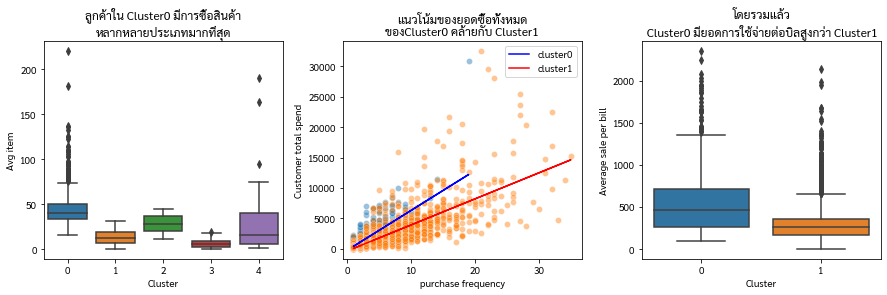

In [39]:
fig, axes = plt.subplots(1,3)
fig.set_figwidth(15)
plt.subplots_adjust(wspace=0.25)
data_c01 = df_cust[(df_cust['Cluster'] == 0) | (df_cust['Cluster'] == 1)]
data_c1 = df_cust_full[df_cust_full['Cluster'] == 1]
data_c0 = df_cust_full[df_cust_full['Cluster'] == 0]
various_purc = sns.boxplot(ax = axes[0], data = df_cust
                            ,y = 'Avg item',x = 'Cluster'
                            )
various_purc.set_title('ลูกค้าใน Cluster0 มีการซื้อสินค้า\nหลากหลายประเภทมากที่สุด')

sale_potential = sns.boxplot(ax = axes[2], data = data_c01
                            ,y = 'Avg Price',x = 'Cluster'
                            )
sale_potential.set_ylabel('Average sale per bill')
sale_potential.set_title('โดยรวมแล้ว\n Cluster0 มียอดการใช้จ่ายต่อบิลสูงกว่า Cluster1')

corr_potential0 = sns.scatterplot(ax = axes[1], data = data_c0, alpha=0.45
                                ,y = 'Total Price', x = 'Total bill'
                                )
corr_potential1 = sns.scatterplot(ax = axes[1], data = data_c1, alpha=0.45
                                ,y = 'Total Price', x = 'Total bill'
                                )
z0 = np.polyfit(data_c0['Total bill'], data_c0['Total Price'], 1)
p0 = np.poly1d(z0)
z1 = np.polyfit(data_c1['Total bill'], data_c1['Total Price'], 1)
p1 = np.poly1d(z1)
line0 = axes[1].plot(data_c0['Total bill'], p0(data_c0['Total bill']),c = 'blue', label = 'cluster0')
line1 = axes[1].plot(data_c1['Total bill'], p1(data_c1['Total bill']),c = 'red', label = 'cluster1')
axes[1].legend()
axes[1].set_title('แนวโน้มของยอดซื้อทั้งหมด\nของCluster0 คล้ายกับ Cluster1')
axes[1].set_ylabel("Customer total spend")
ax1_label = axes[1].set_xlabel("purchase frequency")

* Cluster 0 นานๆทีถึงจะซื้อของ <b>แต่พอซื้อก็เลือกสินค้าหลายชิ้นมากๆ</b> บริษัทสามารถพัฒนาประสบการณ์การซื้อของของลูกค้าได้ หากทำสำเร็จ ปริมาณของลูกค้ากลุ่มนี้จะเพิ่มขึ้น<br>
* Cluster ที่ 0 และ 1 มีลักษณะเป็นลูกค้าทั่วไป แต่จริงๆแล้วลูกค้าใน cluster0 มีศักยภาพที่จะเพิ่มยอดขายได้มากกว่าลูกค้าใน cluster1 เสียอีก
* หากจำนวนลูกค้าในกลุ่มนี้เพิ่มขึ้นมากพอ ลูกค้าใน cluster นี้อาจจะเป็น core value แทน cluster1 ก็ได้

<b> แนวทางสำหรับลูกค้า Cluster ที่ 0: เพิ่มปริมาณลูกค้ากลุ่มนี้ รวมถึงเพิ่มอัตราลูกค้าประจำ <br>
* ปรับปรุงสถานที่ รวมถึงพนักงานขาย เพิ่มความสะดวกสบายในการเลือกซื้อ ในกรณีลูกค้ามาเดินเลือกซื้อแบบ physical item
* ปรับปรุงเว็บไซต์ แอพพลิเคชั่น หรือแพลตฟอร์มการซื้อขาย กรณีที่ลูกค้าซื้อผ่านระบบออนไลน์ เว็บ หรือ แพลตฟอร์ม
* หากมีลูกค้ามาพอ ศึกษาข้อมูลลูกค้าเหมือนกับนโยบายใน cluster0 จากนั้นสนับสนุนให้ลูกค้าเข้ามา ทั้งเพิ่มช่องทางการขาย หรือ จัดกิจกกรรมส่งเสริมการขาย
* ทดสอบทางสถิติว่าความสะดวกสบายส่งผลให้ลูกค้าลักษณะนี้มาใช้บริการเพิ่มขึ้นจริงหรือไม่

<b>แนวทางสำหรับลูกค้า Cluster ที่ 2 และ 4 : กระชับความสัมพันธ์เพื่อการซื้อขายระยะยาว

บริษัทสามารถมีความสัมพันธ์ใกล้ชิดระหว่างลูกค้าที่เป็นหน่วยงานขนาดใหญ่มากกว่าระหว่างลูกค้าที่เป็นบุคคลอยู่แล้ว การรักษาความสัมพันธ์กับลูกค้ากลุ่มนี้จะสามารถรักษาโอกาสทางการขายได้